In [2]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.datasets import load_iris

In [3]:
df = pd.read_csv('./output_result/matrix/test/df_diff.csv',index_col = 0).T

/tmp/ipykernel_32415/380975280.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,

In [1]:
df.shape

NameError: name 'df' is not defined

In [4]:
df['pred'] = [0 if x=='con' else 1 for x in df['pred']]
df=df.astype('float')

In [5]:
df_x,df_y = df.drop('pred',axis=1).values,df['pred'].values

In [6]:
df.columns

Index(['MX2', 'GYPC', 'PDZK1IP1', 'ZNF649', 'HINT3', 'CSRNP1', 'SH3GL3', 'ID3',
       'CAPN5', 'HESX1',
       ...
       'HNRNPAB', 'ZNF613', 'NDUFC1', 'VPS53', 'UBE2H', 'ITGAL', 'TMPRSS11B',
       'SLAMF7', 'HIVEP2', 'pred'],
      dtype='object', length=3601)

In [7]:
df_y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [8]:
label_dict = {0:'con',1:'disease'}

In [9]:
def plot(x, y, title, x_label, y_label):
    ax = plt.subplot(111)
    for label,marker,color in zip(range(2),('^','s'),('blue','red')):
        plt.scatter(x=x[:,0].real[y==label],y=x[:,1].real[y==label],
                   color=color,alpha=0.5,label = label_dict[label])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    leg = plt.legend(loc='upper right',fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)



### 手写PCA

#### 创建数据集的协方差矩阵

In [10]:
#计算均值向量
mean_vector = df_x.mean(axis=0)
print(mean_vector)

#计算协方差矩阵
cov_mat = np.cov(df_x.T)
print(cov_mat.shape)

[10.55647343 10.27558571  8.92287705 ...  2.45786681  7.24903196
  8.27955475]
(3600, 3600)


#### 计算协方差矩阵特征值

In [11]:
# 计算df的特征向量和特征值
eig_val_cov,eig_vec_cov = np.linalg.eig(cov_mat)
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:,i]
    print(f'Eigenvector {i+1}:\n{eigvec_cov}')
    print(f'Eigenvalue {i+1} from covariance matrix: {eig_val_cov[i]}')
    print(30*'-')

Eigenvector 1:
[ 0.02849068+0.j -0.03343874+0.j -0.04208754+0.j ...  0.0081104 +0.j
 -0.01705724+0.j -0.00872076+0.j]
Eigenvalue 1 from covariance matrix: (209.30051341114722+0j)
------------------------------
Eigenvector 2:
[ 0.03648608+0.j  0.00469051+0.j -0.01846936+0.j ... -0.00902607+0.j
  0.01762284+0.j  0.00786293+0.j]
Eigenvalue 2 from covariance matrix: (84.51903043015083+0j)
------------------------------
Eigenvector 3:
[ 0.00947996+0.j -0.05702437+0.j -0.0711505 +0.j ...  0.00326526+0.j
  0.02966228+0.j  0.01512808+0.j]
Eigenvalue 3 from covariance matrix: (78.414686650122+0j)
------------------------------
Eigenvector 4:
[-0.00165815+0.j -0.04767529+0.j -0.04478311+0.j ... -0.01004553+0.j
 -0.01224927+0.j  0.01398454+0.j]
Eigenvalue 4 from covariance matrix: (36.207140948157345+0j)
------------------------------
Eigenvector 5:
[-0.00532171+0.j  0.02862999+0.j  0.02967414+0.j ...  0.00056266+0.j
  0.01270231+0.j  0.01525124+0.j]
Eigenvalue 5 from covariance matrix: (25.81510

#### 按降序保留前K个特征

In [12]:
#每个主成分解释的百分比是特征值除以特征值之和
explained_variance_ratio = eig_val_cov/eig_val_cov.sum()
explained_variance_ratio

array([2.69777366e-01-5.78622018e-34j, 1.08940590e-01-2.33657200e-34j,
       1.01072412e-01-2.16781428e-34j, ...,
       4.20480983e-20-7.30436321e-21j, 5.20111292e-20-1.11554149e-52j,
       1.97852225e-20-4.24356036e-53j])

/data/users/machiyu/anaconda3/envs/Flask/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, '% of Variance eXPLAINED <= k')

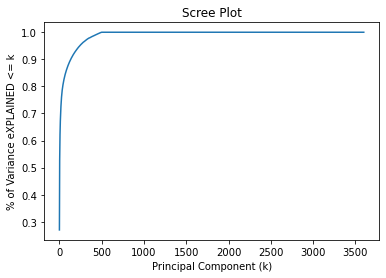

In [13]:
#碎石图
plt.plot(np.cumsum(explained_variance_ratio))
plt.title('Scree Plot')
plt.xlabel('Principal Component (k)')
plt.ylabel('% of Variance eXPLAINED <= k')

In [14]:
k = len(np.cumsum(explained_variance_ratio))-sum(np.cumsum(explained_variance_ratio)>0.95)

#### 使用保留的特征向量转换新的数据点

In [15]:
# 保留K个特征向量
top_k_eigenvectors = eig_vec_cov[:,:k+1].T
top_k_eigenvectors.shape

(242, 3600)

In [16]:
# 将数据集从500x3600转换到500x242.即将数据矩阵和特征向量相乘
newdf = np.dot(df_x,top_k_eigenvectors.T)
newdf.shape

(500, 242)

### scikit_learn的PCA

#### sklearn.decomposition.PCA

In [17]:
pca = PCA(n_components=.95)

In [18]:
pca.fit(df_x)

PCA(n_components=0.95)

In [19]:
pca.components_.shape

(242, 3600)

In [20]:
#新的投影，中心化
pca.transform(df_x).shape

(500, 242)

### 绘制数据集


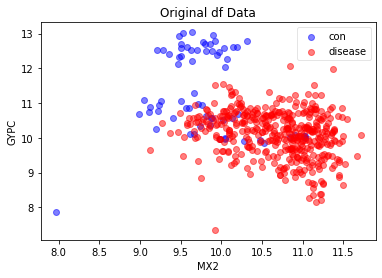

In [21]:
# 原始数据
plot(df_x,df_y,"Original df Data","MX2","GYPC")

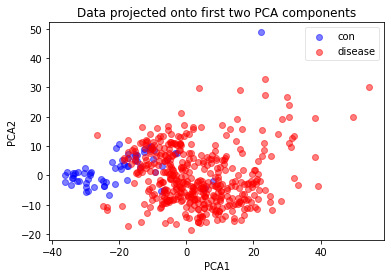

In [22]:
# 投影数据
plot(pca.transform(df_x)[:,:2],df_y,"Data projected onto first two PCA components","PCA1","PCA2")

In [23]:
pca.explained_variance_ratio_

array([0.26977737, 0.10894059, 0.10107241, 0.0466691 , 0.03327431,
       0.02594731, 0.01942701, 0.0174589 , 0.01628009, 0.01226204,
       0.01101514, 0.01072224, 0.00920596, 0.00849234, 0.00815095,
       0.0075778 , 0.00715488, 0.00653079, 0.00610187, 0.00585705,
       0.00547808, 0.00524956, 0.00498737, 0.00457598, 0.00436347,
       0.00391703, 0.00377251, 0.00370334, 0.00338604, 0.00335534,
       0.00327565, 0.00285709, 0.00272227, 0.00262521, 0.00254897,
       0.00243076, 0.00236781, 0.00226599, 0.00215439, 0.00209983,
       0.00198615, 0.00197694, 0.00189885, 0.00186873, 0.00183638,
       0.0018079 , 0.00176967, 0.00171994, 0.00165014, 0.00162618,
       0.00160702, 0.0015872 , 0.0015515 , 0.00152112, 0.00151083,
       0.00145746, 0.00144234, 0.00144017, 0.00141608, 0.00137625,
       0.00135133, 0.00133582, 0.00130591, 0.00126831, 0.00124405,
       0.00123221, 0.00122595, 0.0011937 , 0.00117124, 0.00115874,
       0.00113943, 0.00113075, 0.00111407, 0.00109651, 0.00107

In [3]:
iris = load_iris()

In [47]:
df_x.astype('float')

array([[11.06891061,  8.73520867,  7.76014911, ...,  2.47585381,
         8.08541338,  8.7327975 ],
       [11.03592399,  9.2926809 ,  7.89329806, ...,  2.35894021,
         6.68811755,  8.70682156],
       [10.69566611, 10.74690502,  9.25557956, ...,  2.50150974,
         6.55502312,  8.85298645],
       ...,
       [ 9.95044172, 12.37947711, 11.28981817, ...,  2.26871379,
         6.70573979,  8.36394783],
       [ 9.79564172, 12.70507711, 11.56766817, ...,  2.33330379,
         7.17550312,  8.56632783],
       [ 9.80854172, 12.49367711, 11.19871817, ...,  2.28390379,
         7.11974312,  8.12828783]])

In [10]:
len(df['pred'].values)

500